# Objectives:
1.Provide the learner some more practice for exploratory data analysis.
2.Equip the learner to fit and evaluate a linear regression model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

In [8]:
df = pd.read_csv('cereal.csv')

In [9]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [10]:
dataset = df.as_matrix()

In [11]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

Text(0.5,1,'Sugars')

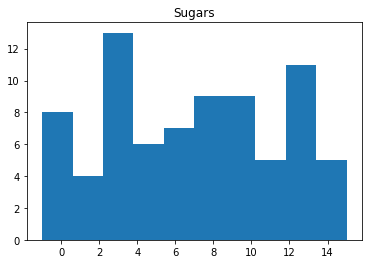

In [12]:
plot.figure()
plot.hist(cereals['sugars'])
plot.title('Sugars')

Text(0.5,1,'Vitamins')

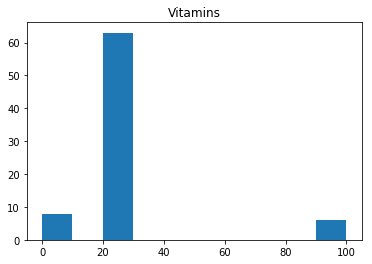

In [13]:
plot.figure()
plot.hist(cereals['vitamins'])
plot.title('Vitamins')

C:\Users\atul\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


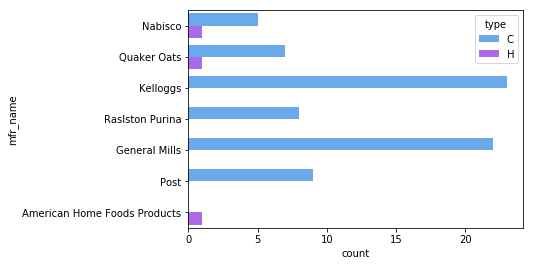

In [14]:
import seaborn as sns
values_dict = {'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina', 'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'}
cereals['mfr_name'] = cereals['mfr'].map(values_dict)
sns.countplot(y = 'mfr_name' , hue = 'type' , data=cereals , palette ='cool')

In [15]:
cereals.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'mfr_name'],
      dtype='object')

In [16]:
df = cereals.iloc[:,3:-1]

In [17]:
dataset = df.as_matrix()

dataset.shape

x= dataset[:,:-1]

y= dataset[:,-1]

In [18]:
x.shape

(77, 12)

In [19]:
y.shape

(77,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=10)
print (X_train.shape)
print (X_test.shape)

(57, 12)
(20, 12)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lr.score(X_test,y_test)

0.99999999999999956

In [25]:
y_predict = lr.predict(X_test)

In [26]:
y_predict - y_test

array([ -1.24692377e-07,   6.68726969e-07,   3.37519079e-07,
        -3.95900067e-07,   4.44604517e-07,   4.02566407e-07,
         7.62804078e-08,   5.44470730e-07,  -2.82373598e-07,
         5.13221686e-07,  -2.41608518e-07,   2.75929295e-07,
         7.98743187e-08,   7.26096943e-08,   3.93207195e-07,
         4.56070204e-07,  -5.59116167e-07,  -3.44223356e-07,
         7.61776207e-08,   4.42949446e-07])

In [27]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)

In [30]:
print (mse)

1.44020737752e-13
